In [86]:
import pandas as pd
import numpy as np

from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.rcParams['figure.figsize'] = [12, 8]

In [57]:
df = pd.read_csv('final.csv', parse_dates=['date']).sort_values('date').set_index('date')
df = df.iloc[1:]
df.head()

,content_score,desc_score,title_score,Open,High,Low,Close,Adj Close,Volume,change_close
date,,,,,,,,,,
2018-09-25,0.044822,0.161199,0.111867,219.750000,222.820007,219.699997,222.190002,221.417435,24554400,1.400009
2018-09-26,-0.043366,0.063646,0.091782,221.000000,223.750000,219.759995,220.419998,219.653595,23984700,-1.770004
2018-09-27,0.067147,0.207833,0.092848,223.820007,226.440002,223.539993,224.949997,224.167831,30181200,4.529999
2018-09-28,0.061063,0.112903,0.112483,224.789993,225.839996,224.020004,225.740005,224.955093,22929400,0.790008
2018-10-01,0.053996,0.051756,0.029758,227.949997,229.419998,226.350006,227.259995,226.469803,23600800,1.519990


In [58]:
pearsonr(df['desc_score'], df['change_close'])

(0.20609092516880828, 0.38335350014223213)

In [59]:
pcc(df['desc_score'], df['change_close'])

0.19578637891036788

In [71]:
def pcc(X, Y):
    m = X.size
    
    stdX = X.std()
    stdY = Y.std()
    
    # Normalise X and Y
    X -= X.mean()
    Y -= Y.mean()
    
    X = np.divide(X, stdX)
    Y = np.divide(Y, stdY)
    
    return (1/(m-1))*np.sum(np.multiply(X, Y))

In [73]:
(
    pcc(df['title_score'], df['change_close']),
    pcc(df['desc_score'], df['change_close']),
    pcc(df['content_score'], df['change_close'])
)

(0.10358729901252277, 0.20609092516880825, 0.18659629580552534)

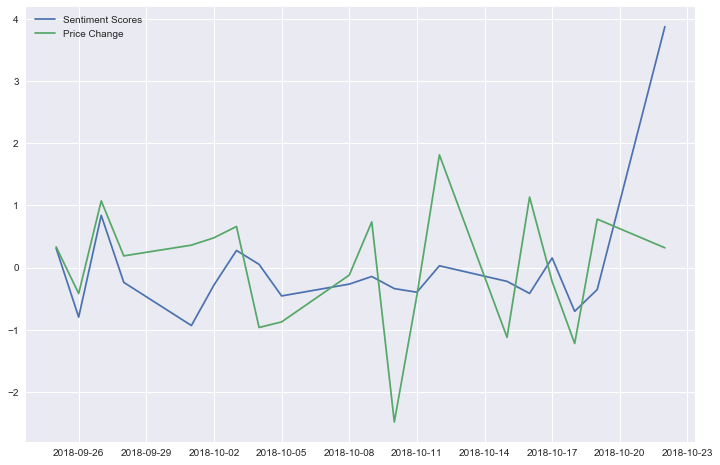

In [87]:
plt.plot( (df['desc_score'] - df['desc_score'].mean()) / df['desc_score'].std() )
plt.plot( (df['change_close'] - df['change_close'].mean()) / df['change_close'].std() )
plt.legend(["Sentiment Scores", "Price Change"])
plt.show()

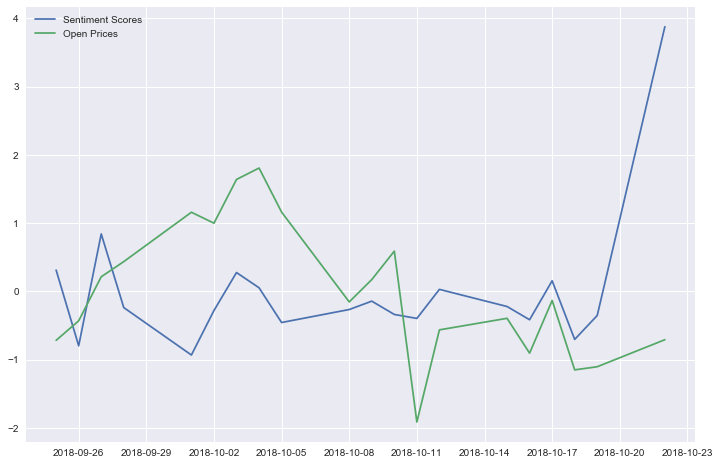

In [88]:
plt.plot( (df['desc_score'] - df['desc_score'].mean()) / df['desc_score'].std() )
plt.plot( (df['Open'] - df['Open'].mean()) / df['Open'].std() )
plt.legend(["Sentiment Scores", "Open Prices"])
plt.show()